Some notes for the question asked at:

https://github.com/skyfielders/python-skyfield/issues/280

In [1]:
%pylab inline
import numpy as np
from skyfield.api import load

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('/home/brandon/skyfield')
import Test_05

[#################################] 100% deltat.data
[#################################] 100% deltat.preds
[#################################] 100% Leap_Second.dat
[#################################] 100% de421.bsp


OLD values use find_discrete(); NEW values use find_transit()
113.078502776255
Upper transit on 12.01.2019  OLD: 04:16  NEW: 16:56
   GHA at 16:56 :    359.95432452382823 or -0.04567547617176615
   GHA at 16:57 :    0.19717810522401735
   diff: 0.1515026290522512


In [4]:
ts = Test_05.ts

In [6]:
is_moon_transit_at = Test_05.uppertransit()

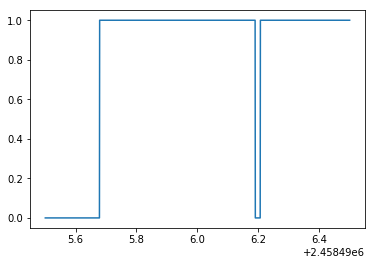

In [9]:
t = ts.utc(2019, 1, 12, 0, range(60 * 24))
y = is_moon_transit_at(t)
plot(t.tt, y)

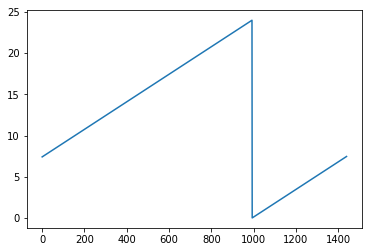

In [10]:
plot(t.gast)

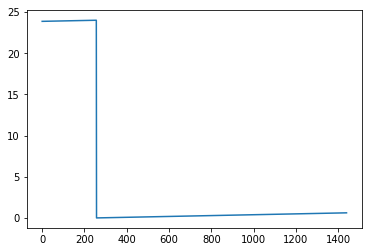

In [14]:
earth = Test_05.earth
moon = Test_05.moon
position = earth.at(t).observe(moon)
ra = position.apparent().radec(epoch='date')[0]
plot(ra.hours)

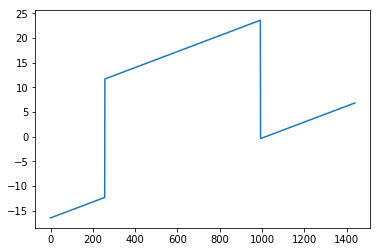

In [15]:
# The problem: each value wraps back to 0 on its own schedule,
# causing jumps of 24 hours in either direction.

plot(t.gast - ra.hours)

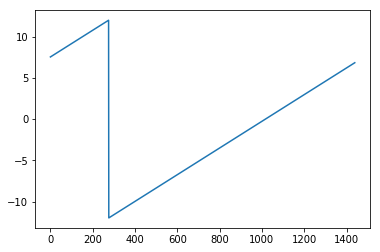

In [17]:
# One possible solution: constrain the result
# to always be between -12 and +12.

plot((t.gast - ra.hours + 12) % 24 - 12)